# Introduction

Analyzing the effects of various features on 2015 Kings County housing prices using Linear Regression Modeling.
Specifically looking at effects on Price Per Square Foot (PSF).
PSF is another measure of value in addition to just overall price.

# Imports and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
#Importing model function from class
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    # sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    # modified to display summary and return the model
    display(model.summary())
    return model

In [3]:
# Data Import
df = pd.read_csv('data/kc_house_data.csv')

# Data Exploration

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Visualizations

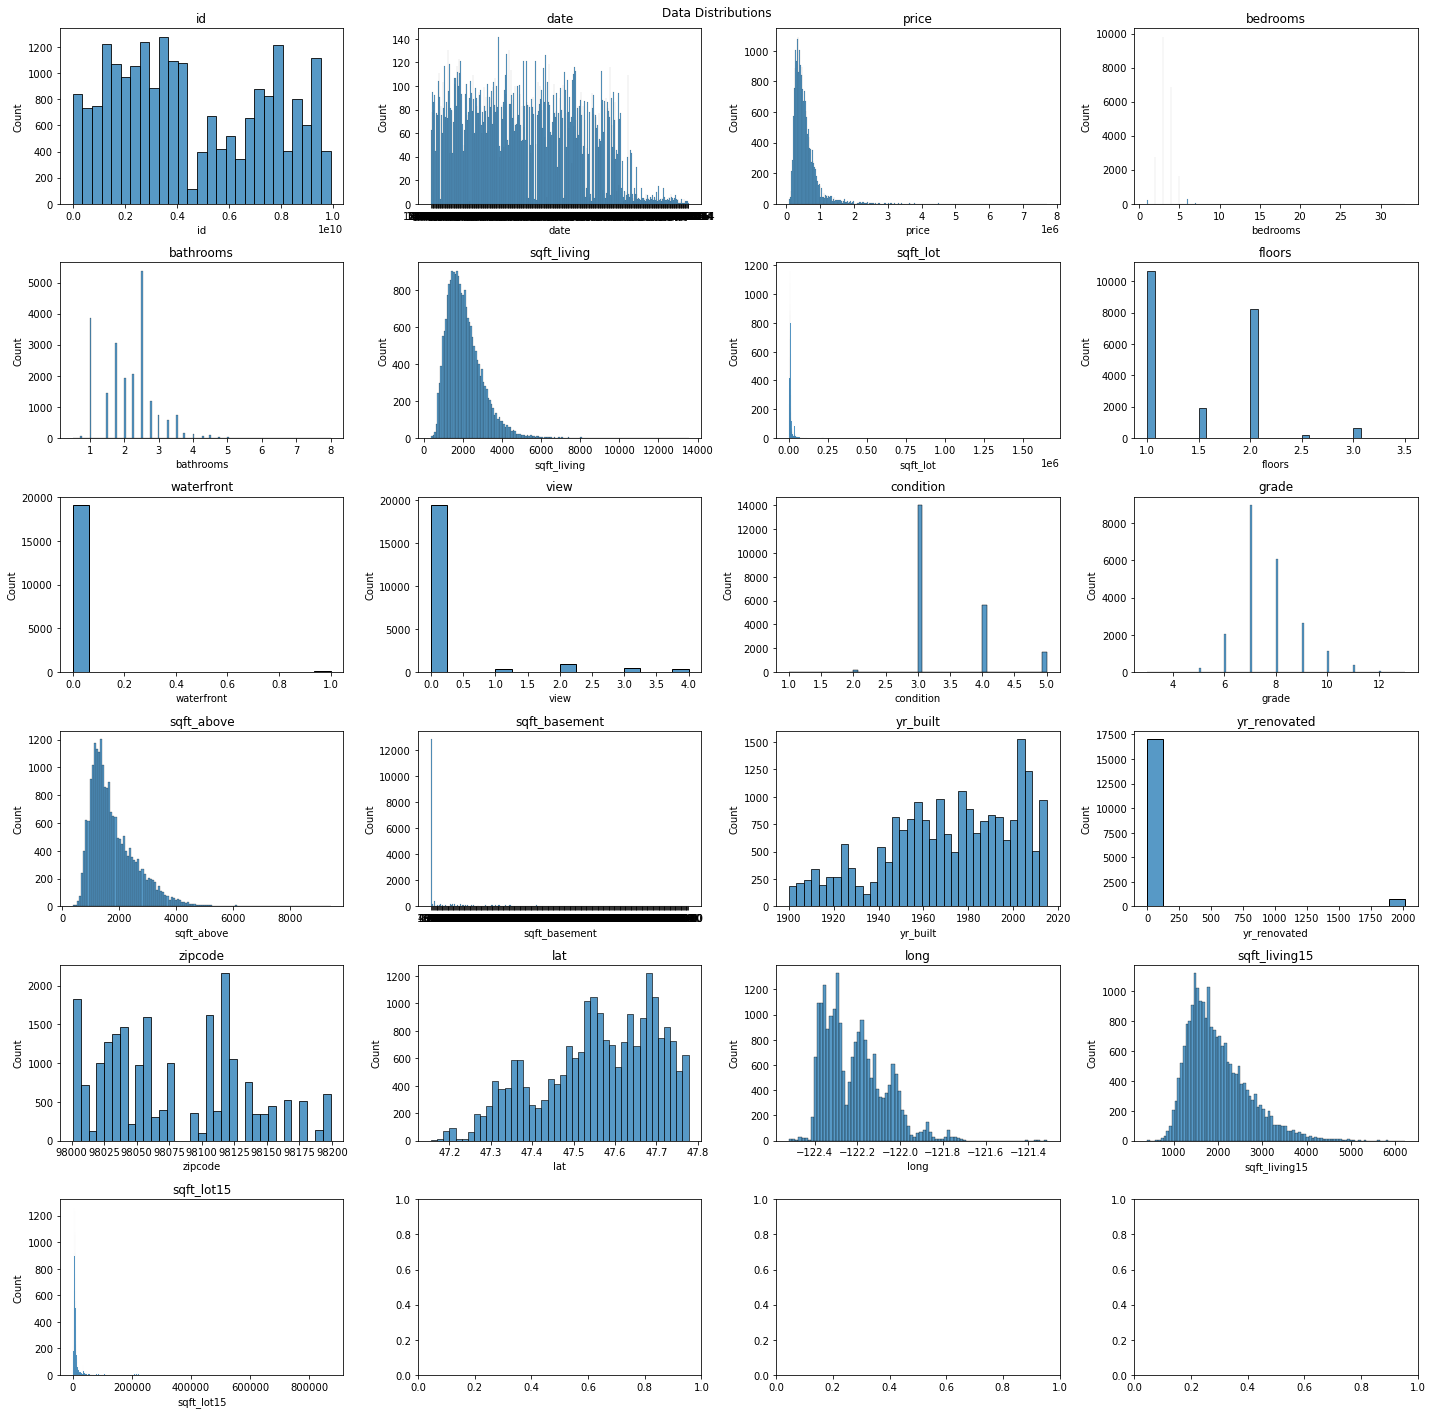

In [8]:
# Looking at the distributions of each feature
fig, axes = plt.subplots(figsize=(20,20),ncols=4,nrows=6)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]

    sns.histplot(df[col],ax=ax, bins = 'auto')
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

## Findings

* Many of the distributions are skewed to the right with strong outliers
* Other features do not make sense to analyze numerically such as: id, date, zipcodes
* A few others need additional exploration such as: basement sqft, year renovated that also have large 0 value counts

In [9]:
continuous_columns = ['price','sqft_living','sq_lot','condition','grade','sqft_above','yr_built', 'lat','long']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','sqft_basement','yr_renovated']

#columns to be dropped
dropped_columns = ['id','date','view','sqft_living15','sqft_lot15','zipcode', 'lat','long']

# Data Cleaning

## Dropping Unwanted Columns

In [10]:
cleaned_df = df.drop(dropped_columns,axis=1)

In [11]:
cleaned_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

## Filling NA values with 0

In [12]:
for col in cleaned_df.columns:
    print(col,": ",cleaned_df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  2376
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  3842


In [13]:
cleaned_df = cleaned_df.fillna(0)

In [14]:
for col in cleaned_df.columns:
    print(col,": ",cleaned_df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  0
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  0


## Converting Basement SqFt to Float

In [15]:
cleaned_df = cleaned_df.replace(to_replace='?',value=0)

In [16]:
cleaned_df['sqft_basement'] = cleaned_df.sqft_basement.astype(float)

In [17]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 2.1 MB


# Generating and Modifying Features

In [18]:
mod_df = cleaned_df

## Price Per Square Foot (PSF) Using Sqft_Above

In [19]:
mod_df['psf'] = mod_df['price'] / mod_df['sqft_above']

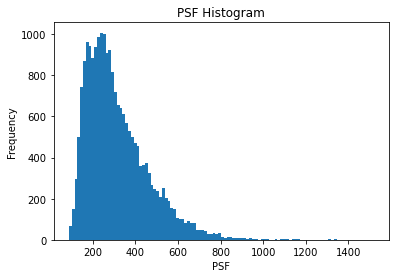

In [20]:
plt.hist(mod_df['psf'], bins='auto');
plt.title('PSF Histogram')
plt.xlabel('PSF')
plt.ylabel('Frequency');

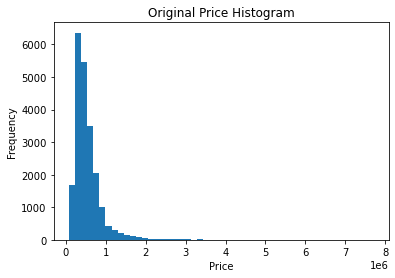

In [21]:
plt.hist(mod_df['price'], bins=50);
plt.title('Original Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency');

* PSF appears more normally distributed than original price, 
  but distribution remains skewed towards higher PSF

## Living to Lot Sqft Ratio

In [22]:
mod_df['livtolot'] = mod_df['sqft_living']/mod_df['sqft_lot']

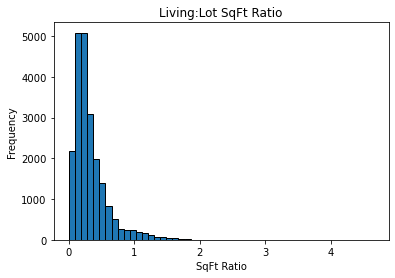

In [23]:
plt.hist(mod_df['livtolot'], bins=50, ec = 'black');
plt.title('Living:Lot SqFt Ratio')
plt.xlabel('SqFt Ratio')
plt.ylabel('Frequency');

## Categorical Changes

### Basement Sqft to Categorical (Yes or No)

In [24]:
mod_df['has_basement'] = mod_df['sqft_basement'] > 0
mod_df['has_basement'] = mod_df['has_basement'].astype(int)

In [25]:
mod_df['has_basement'].value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

### Renovation Year to Categorical (Recent Reno or None)

In [26]:
# Using 27 years as a cutoff between recent renovations
mod_df['rec_reno'] = (mod_df['yr_renovated'] > 1988).astype(int)

In [27]:
mod_df['rec_reno'].value_counts()

0    21055
1      542
Name: rec_reno, dtype: int64

# Modified Features Exploration

## Dropping Unused Columns

In [28]:
processed = mod_df

In [29]:
processed.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'psf', 'livtolot', 'has_basement',
       'rec_reno'],
      dtype='object')

In [30]:
modded_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_renovated']

In [31]:
processed = processed.drop(modded_cols, axis =1)

In [32]:
processed.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'psf', 'livtolot', 'has_basement', 'rec_reno'],
      dtype='object')

## Linearity Checks

In [33]:
len(processed.columns)

11

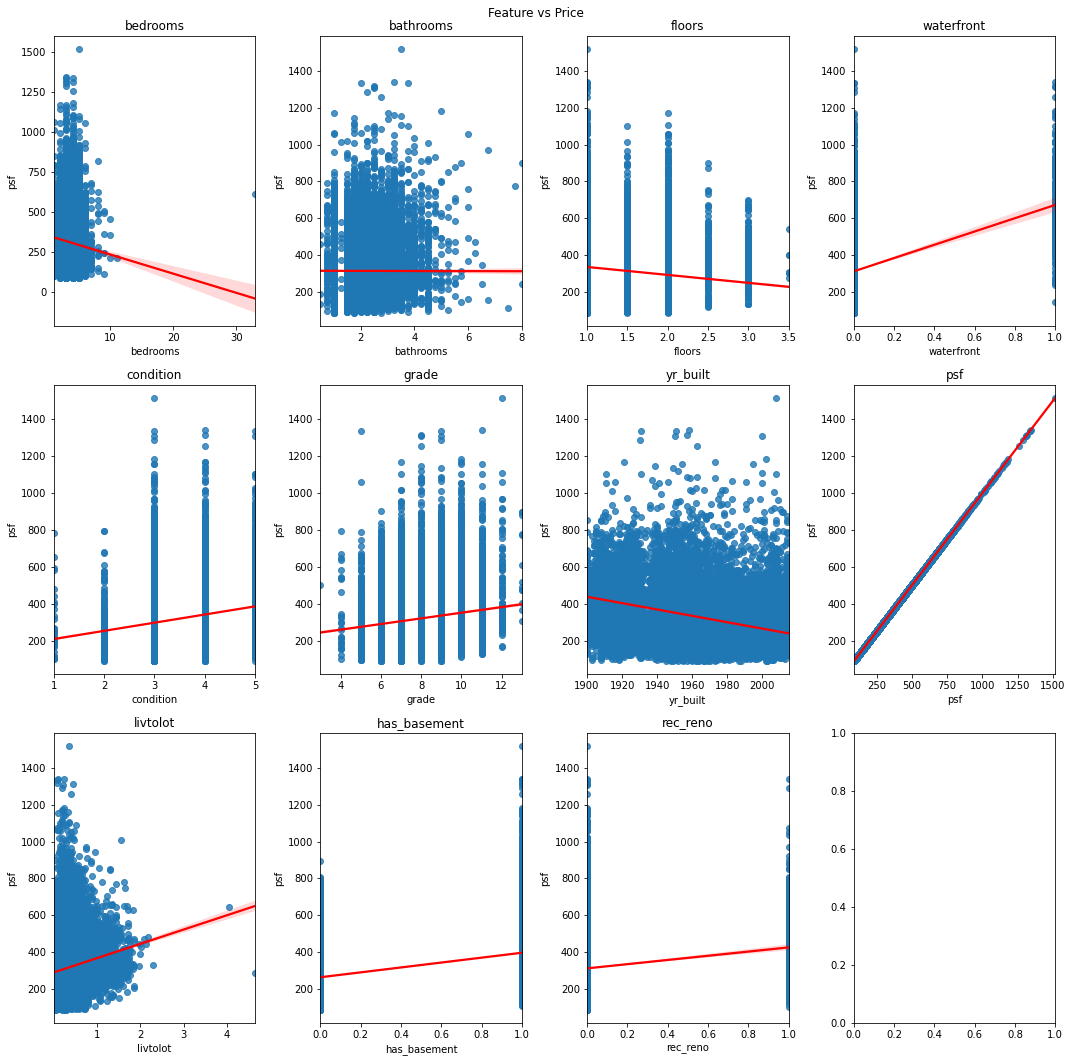

In [34]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(processed.columns)):
    col = processed.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    sns.regplot(x=col, y='psf', data=processed, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

#### Removing Erroneous Looking Bedroom Value

In [35]:
processed = processed.drop(processed.loc[processed.bedrooms > 30].index)

#### Removing Large Liv to Lot Values

In [36]:
processed = processed.drop(processed.loc[processed.livtolot > 4].index)

## Second Linearity Checks

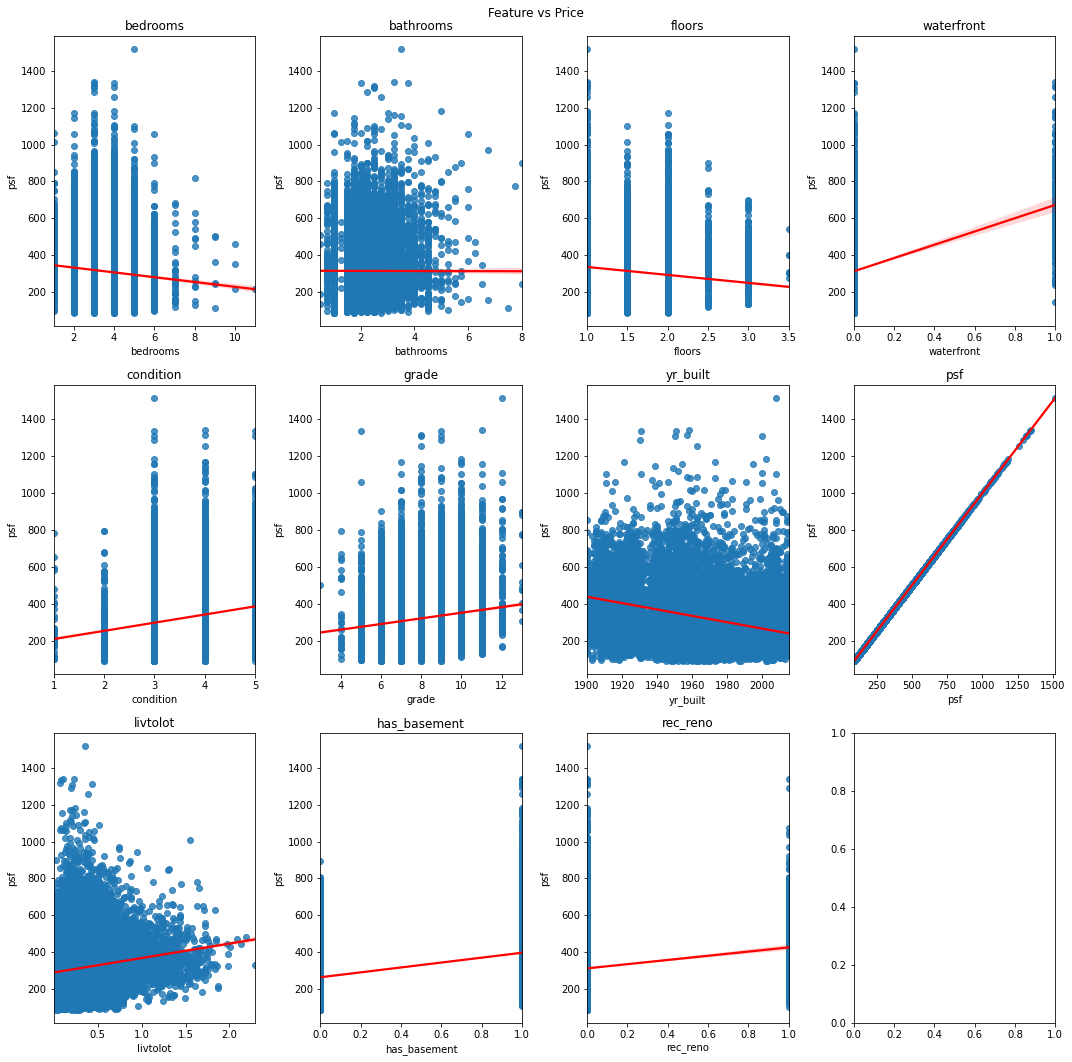

In [37]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(processed.columns)):
    col = processed.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    #sns.scatterplot(df[col], df['price'],ax=ax)
    sns.regplot(x=col, y='psf', data=processed, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

### Findings

* Many of the features do not appear strongly lineary related to PSF
* Considering transformations to improve R Squared after initial analysis

## MultiCollinearity

In [38]:
processed.corr()

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,psf,livtolot,has_basement,rec_reno
bedrooms,1.000000,0.527960,0.183948,-0.002058,0.023418,0.366487,0.160948,-0.079863,0.028521,0.160524,0.031583
bathrooms,0.527960,1.000000,0.502606,0.063629,-0.126446,0.665893,0.507177,-0.001636,0.290111,0.159860,0.068414
floors,0.183948,0.502606,1.000000,0.020808,-0.263984,0.458587,0.489176,-0.157900,0.560918,-0.252647,0.007530
waterfront,-0.002058,0.063629,0.020808,1.000000,0.016655,0.082842,-0.024499,0.200305,-0.030009,0.039230,0.048175
condition,0.023418,-0.126446,-0.263984,0.016655,1.000000,-0.146818,-0.361657,0.195487,-0.157287,0.130444,-0.072412
grade,0.366487,0.665893,0.458587,0.082842,-0.146818,1.000000,0.447779,0.121800,0.192043,0.050561,0.037720
yr_built,0.160948,0.507177,0.489176,-0.024499,-0.361657,0.447779,1.000000,-0.344073,0.283016,-0.164159,-0.155568
psf,-0.079863,-0.001636,-0.157900,0.200305,0.195487,0.121800,-0.344073,1.000000,0.141329,0.438232,0.120538
livtolot,0.028521,0.290111,0.560918,-0.030009,-0.157287,0.192043,0.283016,0.141329,1.000000,0.153518,0.013344
has_basement,0.160524,0.159860,-0.252647,0.039230,0.130444,0.050561,-0.164159,0.438232,0.153518,1.000000,0.049459


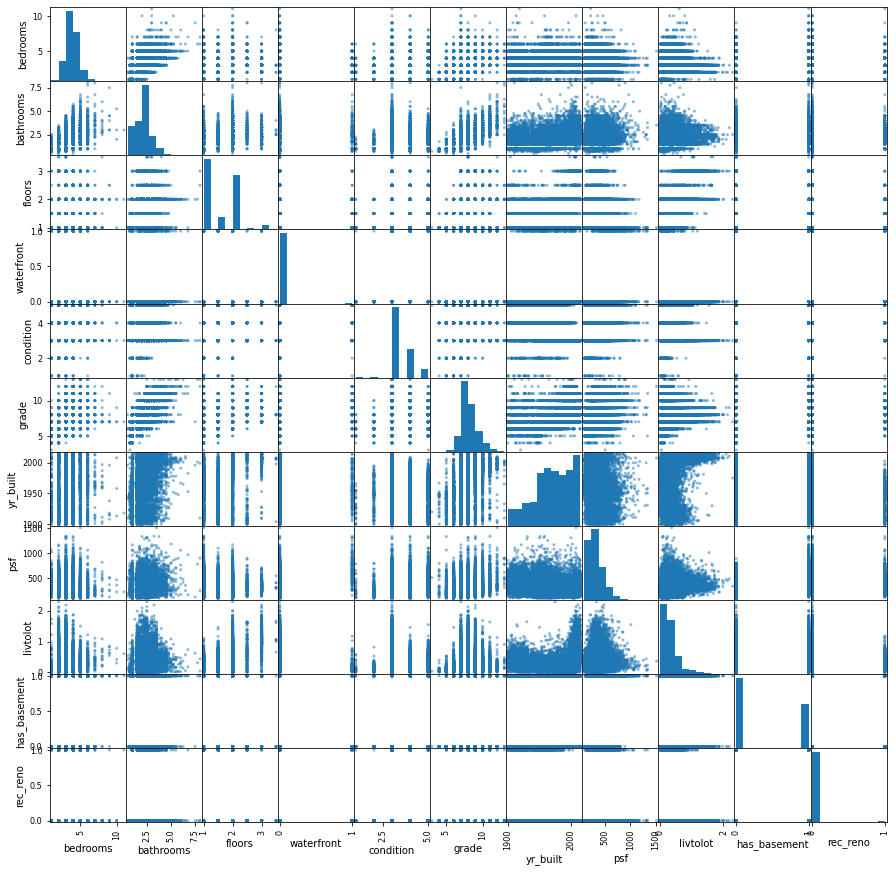

In [39]:
pd.plotting.scatter_matrix(processed, figsize = [15,15]);

### Findings

* There aren't any strong multicollinear features present
* Need to keep an eye on the relationship between bathrooms, floors, grade, and year built

# Initial Regression Modeling

In [40]:
processed.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'psf', 'livtolot', 'has_basement', 'rec_reno'],
      dtype='object')

In [41]:
x = processed[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y = processed[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## Model Summary

In [42]:
initial_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.43377432194621235
Test R2:  0.40822081321214365
Train RMSE:  110.71677232083508
Test RMSE:  114.30944573409586


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1323.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:39   Log-Likelihood:            -1.0583e+05
No. Observations:               17275   AIC:                         2.117e+05
Df Residuals:                   17264   BIC:                         2.118e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3924.9503     77.284     50.786      0.000    3773.465    4076.435
bedrooms       -29.9995      1.122    -26.731      0.000     -32.199     -27.800
bathrooms        0.5633      1.846      0.305      0.760      -3.055       4.182
floors         -38.6460      2.539    -15.221      0.000     -43.623     -33.669
waterfront     274.8170     10.251     26.810      0.000     254.725     294.909
condition       16.5457      1.423     11.625      0.000      13.756      19.336
grade           45.7833      1.007     45.487      0.000      43.810      47.756
yr_built        -1.9987      0.039    -50.795      0.000      -2.076      -1.922
livtolot       132.1307      4.243     31.143      0.000     123.815     140.447
has_basement    89.4726      2.131     41.987      0.000      85.296      93.649
rec_reno        35.1105      5.640      6.225      0.000      24.055      46.166
==============================================================================
Omnibus:                     3452.405   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10834.579
Skew:                           1.024   Prob(JB):                         0.00
Kurtosis:                       6.295   Cond. No.                     1.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Dropping High P Values

In [43]:
x_bath = x.drop('bathrooms', axis = 1)

### Model Summary Update

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_bath,y,test_size=0.2)
initial_model2 = model(x_train,x_test,y_train,y_test);

Train R2:  0.4242140546352119
Test R2:  0.44561229900341603
Train RMSE:  111.58161271753842
Test RMSE:  110.89446540988133


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1413.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:39   Log-Likelihood:            -1.0596e+05
No. Observations:               17275   AIC:                         2.119e+05
Df Residuals:                   17265   BIC:                         2.120e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3859.0573     72.470     53.250      0.000    3717.008    4001.106
bedrooms       -28.8308      1.037    -27.804      0.000     -30.863     -26.798
floors         -39.2296      2.467    -15.902      0.000     -44.065     -34.394
waterfront     278.1893     10.722     25.945      0.000     257.173     299.206
condition       15.8488      1.430     11.083      0.000      13.046      18.652
grade           44.9799      0.925     48.627      0.000      43.167      46.793
yr_built        -1.9617      0.037    -52.583      0.000      -2.035      -1.889
livtolot       132.0443      4.306     30.666      0.000     123.604     140.484
has_basement    89.9748      2.071     43.436      0.000      85.915      94.035
rec_reno        29.5171      5.670      5.206      0.000      18.403      40.631
==============================================================================
Omnibus:                     3908.105   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14175.305
Skew:                           1.107   Prob(JB):                         0.00
Kurtosis:                       6.846   Cond. No.                     1.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumptions Check

### Normalization

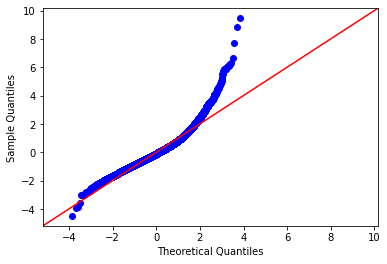

In [45]:
initial_residuals = initial_model2.resid
fig = sm.graphics.qqplot(initial_residuals,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

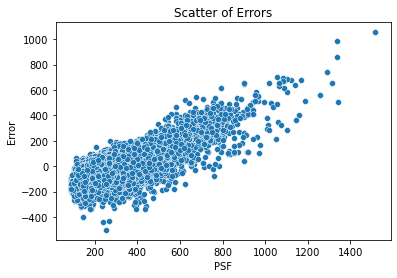

In [46]:
sns.scatterplot(y_train,initial_residuals)
plt.title('Scatter of Errors')
plt.xlabel('PSF')
plt.ylabel('Error');

## Findings

* Benchmark R-Squared is .433
* RMSE difference between Train and Test is low at ~4 PSF 
* Distribution of Residuals are skewed to the right
* Fails homoscedasticity check, higher PSF are largely underpredicted and lower PSF overpredicted

# Iteration 2: Log Transforms

## Log Transformation

In [47]:
log_df = processed.drop('bathrooms',axis=1)

In [48]:
log_cont = ['bedrooms','floors','condition','grade','yr_built','psf','livtolot']

In [49]:
for cat in log_cont:
    log_df[cat] = np.log(log_df[cat])

In [50]:
log_df.head()

,bedrooms,floors,waterfront,condition,grade,yr_built,psf,livtolot,has_basement,rec_reno
0,1.098612,0.000000,0.0,1.098612,1.945910,7.578145,5.236712,-1.566141,0,0
1,1.098612,0.693147,0.0,1.098612,1.945910,7.576097,5.513131,-1.035992,1,1
2,0.693147,0.000000,0.0,1.098612,1.791759,7.566828,5.454322,-2.563950,0,0
3,1.386294,0.000000,0.0,1.609438,1.945910,7.583248,6.354784,-0.936493,1,0
4,1.098612,0.000000,0.0,1.098612,2.079442,7.594381,5.715617,-1.570598,0,0


## Model Summary

In [51]:
x_log = log_df[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y_log = log_df[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_log,y_log,test_size=0.2)
log_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.41893298397229817
Test R2:  0.40543209595255114
Train RMSE:  0.3374762326415983
Test RMSE:  0.3416505680227557


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     1383.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:40   Log-Likelihood:                -5747.0
No. Observations:               17275   AIC:                         1.151e+04
Df Residuals:                   17265   BIC:                         1.159e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       85.0225      1.658     51.295      0.000      81.774      88.271
bedrooms        -0.3954      0.010    -39.376      0.000      -0.415      -0.376
floors          -0.0788      0.010     -7.687      0.000      -0.099      -0.059
waterfront       0.5595      0.032     17.642      0.000       0.497       0.622
condition        0.1691      0.015     10.981      0.000       0.139       0.199
grade            1.0884      0.022     48.872      0.000       1.045       1.132
yr_built       -10.7189      0.220    -48.786      0.000     -11.150     -10.288
livtolot         0.0704      0.003     20.334      0.000       0.064       0.077
has_basement     0.3269      0.006     54.239      0.000       0.315       0.339
rec_reno         0.0683      0.017      4.077      0.000       0.035       0.101
==============================================================================
Omnibus:                       39.793   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.334
Skew:                          -0.027   Prob(JB):                     1.94e-11
Kurtosis:                       3.256   Cond. No.                     5.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Summary Update - Only Log Transform Features

In [52]:
x_log = log_df[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y_log = processed[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_log,y_log,test_size=0.2)
log_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.42057306148389706
Test R2:  0.40835279017010895
Train RMSE:  111.94256448586863
Test RMSE:  114.52499877644922


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1392.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:40   Log-Likelihood:            -1.0602e+05
No. Observations:               17275   AIC:                         2.121e+05
Df Residuals:                   17265   BIC:                         2.121e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.684e+04    551.832     48.642      0.000    2.58e+04    2.79e+04
bedrooms      -121.8798      3.338    -36.508      0.000    -128.424    -115.336
floors         -32.9184      3.397     -9.689      0.000     -39.578     -26.259
waterfront     276.1353     10.711     25.780      0.000     255.140     297.130
condition       60.4936      5.152     11.743      0.000      50.396      70.591
grade          349.1528      7.383     47.290      0.000     334.681     363.625
yr_built     -3579.7456     73.148    -48.938      0.000   -3723.123   -3436.368
livtolot        26.1392      1.147     22.790      0.000      23.891      28.387
has_basement    99.9772      2.002     49.933      0.000      96.053     103.902
rec_reno        38.1745      5.598      6.820      0.000      27.203      49.146
==============================================================================
Omnibus:                     3657.877   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12788.998
Skew:                           1.048   Prob(JB):                         0.00
Kurtosis:                       6.657   Cond. No.                     5.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Summary Update - Only Log Transform PSF

In [53]:
x_log2 = processed[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built','livtolot', 'has_basement','rec_reno']]
y_log2 = log_df[['psf']].to_numpy().flatten()
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_log2,y_log2,test_size=0.2)
log_model2 = model(x_train2,x_test2,y_train2,y_test2);

Train R2:  0.430779410910351
Test R2:  0.4225647527332306
Train RMSE:  0.33272575296465207
Test RMSE:  0.3418443082819723


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1452.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:40   Log-Likelihood:                -5502.1
No. Observations:               17275   AIC:                         1.102e+04
Df Residuals:                   17265   BIC:                         1.110e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       16.3548      0.217     75.358      0.000      15.929      16.780
bedrooms        -0.0996      0.003    -31.953      0.000      -0.106      -0.093
floors          -0.1097      0.007    -14.849      0.000      -0.124      -0.095
waterfront       0.5736      0.031     18.259      0.000       0.512       0.635
condition        0.0469      0.004     11.007      0.000       0.039       0.055
grade            0.1387      0.003     50.103      0.000       0.133       0.144
yr_built        -0.0059      0.000    -52.992      0.000      -0.006      -0.006
livtolot         0.3991      0.013     31.165      0.000       0.374       0.424
has_basement     0.2891      0.006     46.819      0.000       0.277       0.301
rec_reno         0.0493      0.017      2.929      0.003       0.016       0.082
==============================================================================
Omnibus:                       40.576   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.921
Skew:                          -0.045   Prob(JB):                     2.38e-11
Kurtosis:                       3.244   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Log transforming PSF yielded best results along with no high p values

## Assumptions Check

### Normalization

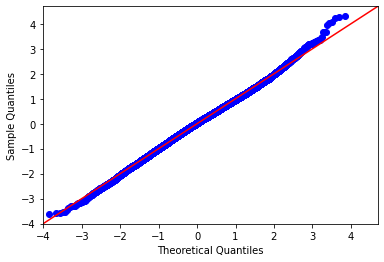

In [55]:
log_residuals2 = log_model2.resid
fig = sm.graphics.qqplot(log_residuals2,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

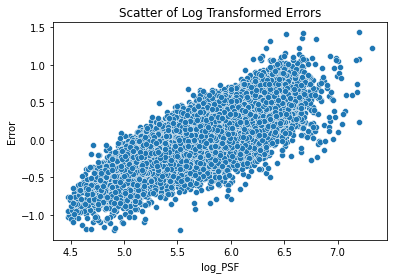

In [56]:
sns.scatterplot(y_train2,log_residuals2)
plt.title('Scatter of Log Transformed Errors')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* R Squared is worse at .426 after log transforming just PSF
* Difference in RMSE is low at .001 log(PSF), equates to ~ 1 PSF
* Distribution of residuals is close to normal
* Still fails homoscedasticity.  However, appears more randomly distributed

# Iteration 3: Adding Back ZipCodes

* Considered adding back some location features to see the effects on the model

## Re-updating DataFrame and Cleaning

In [57]:
dropped_columns2 = ['id','date','view','sqft_living15','sqft_lot15','bathrooms', 'lat','long']

In [58]:
df_zip = df.drop(dropped_columns2,axis=1)

In [59]:
df_zip.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [60]:
# Handling NA Values
df_zip = df_zip.fillna(0)
df_zip = df_zip.replace(to_replace='?',value=0)

# Feature Generation and Modifications
df_zip['sqft_basement'] = df_zip.sqft_basement.astype(float)
df_zip['psf'] = df_zip['price'] / df_zip['sqft_above']
df_zip['livtolot'] = df_zip['sqft_living']/df_zip['sqft_lot']
df_zip['has_basement'] = df_zip['sqft_basement'] > 0
df_zip['has_basement'] = df_zip['has_basement'].astype(int)
df_zip['rec_reno'] = (df_zip['yr_renovated'] > 1988).astype(int)

modded_cols = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','yr_renovated']
df_zip = df_zip.drop(modded_cols, axis =1)

# Removing Extreme Values
df_zip = df_zip.drop(df_zip.loc[df_zip.bedrooms > 30].index)
df_zip = df_zip.drop(df_zip.loc[df_zip.livtolot > 4].index)

In [61]:
df_zip.head()

,bedrooms,floors,waterfront,condition,grade,yr_built,zipcode,psf,livtolot,has_basement,rec_reno
0,3,1.0,0.0,3,7,1955,98178,188.050847,0.208850,0,0
1,3,2.0,0.0,3,7,1951,98125,247.926267,0.354874,1,1
2,2,1.0,0.0,3,6,1933,98028,233.766234,0.077000,0,0
3,4,1.0,0.0,5,7,1965,98136,575.238095,0.392000,1,0
4,3,1.0,0.0,3,8,1987,98074,303.571429,0.207921,0,0


## Creating Dummy Variables for Zipcodes

In [62]:
dummy_zips = pd.get_dummies(df_zip['zipcode'], prefix='zip', drop_first=True)
df_zip = pd.concat([df_zip, dummy_zips], axis=1)

In [63]:
df_zip = df_zip.drop('zipcode', axis=1)

## Model Summary

In [64]:
x_zip = df_zip.drop('psf',axis=1)
y_zip = df_zip[['psf']].to_numpy().flatten()
x_train, x_test, y_train, y_test = train_test_split(x_zip,y_zip,test_size=0.2)
zip_model = model(x_train,x_test,y_train,y_test);

Train R2:  0.7204509150178939
Test R2:  0.7005919511975671
Train RMSE:  77.727043151373
Test RMSE:  81.58722742408328


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:41   Log-Likelihood:                -99714.
No. Observations:               17275   AIC:                         1.996e+05
Df Residuals:                   17196   BIC:                         2.002e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      144.4244     68.102      2.121      0.034      10.938     277.911
bedrooms       -20.5132      0.751    -27.300      0.000     -21.986     -19.040
floors         -42.7397      1.771    -24.132      0.000     -46.211     -39.268
waterfront     328.4401      7.525     43.644      0.000     313.689     343.191
condition       19.2524      1.034     18.619      0.000      17.226      21.279
grade           13.4300      0.723     18.571      0.000      12.013      14.847
yr_built        -0.0083      0.035     -0.238      0.812      -0.076       0.060
livtolot       -35.8236      3.663     -9.781      0.000     -43.003     -28.645
has_basement    74.3013      1.485     50.046      0.000      71.391      77.211
rec_reno        37.4289      3.964      9.441      0.000      29.658      45.199
zip_98002       -5.6068      7.695     -0.729      0.466     -20.690       9.476
zip_98003       -3.0284      6.946     -0.436      0.663     -16.642      10.586
zip_98004      384.4756      6.876     55.916      0.000     370.998     397.953
zip_98005      179.7199      8.283     21.698      0.000     163.485     195.955
zip_98006      174.9147      6.105     28.650      0.000     162.948     186.881
zip_98007      156.9835      8.659     18.129      0.000     140.011     173.956
zip_98008      172.1601      6.994     24.616      0.000     158.451     185.869
zip_98010       66.5868     10.169      6.548      0.000      46.655      86.518
zip_98011       90.0815      7.857     11.465      0.000      74.680     105.483
zip_98014       66.1733      9.104      7.269      0.000      48.328      84.018
zip_98019       64.1506      7.797      8.228      0.000      48.868      79.433
zip_98022       14.4117      7.436      1.938      0.053      -0.164      28.988
zip_98023      -14.7937      6.018     -2.458      0.014     -26.589      -2.999
zip_98024       91.3939     10.520      8.687      0.000      70.773     112.015
zip_98027      114.2134      6.392     17.869      0.000     101.685     126.741
zip_98028       90.2415      6.848     13.178      0.000      76.819     103.664
zip_98029      144.1839      6.772     21.293      0.000     130.911     157.457
zip_98030        8.9491      7.188      1.245      0.213      -5.141      23.039
zip_98031       11.5224      6.958      1.656      0.098      -2.116      25.160
zip_98032      -15.2703      9.275     -1.646      0.100     -33.449       2.909
zip_98033      219.4658      6.297     34.851      0.000     207.123     231.809
zip_98034      125.5375      5.974     21.014      0.000     113.828     137.247
zip_98038       40.0817      5.834      6.871      0.000      28.647      51.516
zip_98039      458.2905     13.537     33.855      0.000     431.757     484.824
zip_98040      275.3796      7.102     38.773      0.000     261.458     289.301
zip_9

### Dropping High P

In [65]:
(zip_model.pvalues > .05).sort_values()

Intercept    False
zip_98108    False
zip_98107    False
zip_98106    False
zip_98105    False
             ...  
zip_98003     True
zip_98030     True
zip_98092     True
zip_98148     True
zip_98042     True
Length: 79, dtype: bool

In [66]:
high_p = zip_model.pvalues.loc[zip_model.pvalues > .05].index
high_p

Index(['yr_built', 'zip_98002', 'zip_98003', 'zip_98022', 'zip_98030',
       'zip_98031', 'zip_98032', 'zip_98042', 'zip_98092', 'zip_98148',
       'zip_98188', 'zip_98198'],
      dtype='object')

In [67]:
#Intercept excluded for dropping columns
high_p_indexes = ['yr_built', 'zip_98002', 'zip_98003', 'zip_98022',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98042', 'zip_98092',
       'zip_98198']

In [68]:
zip_df_update = df_zip.drop(high_p_indexes,axis=1)

### Model Summary Update

In [69]:
x_zip2 = zip_df_update.drop('psf',axis=1)
y_zip2= zip_df_update[['psf']].to_numpy().flatten()
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_zip2,y_zip2,test_size=0.2)
zip_model2 = model(x_train2,x_test2,y_train2,y_test2);

Train R2:  0.7189197728749639
Test R2:  0.7055430384818876
Train RMSE:  77.9891549599039
Test RMSE:  80.7079262098691


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     647.2
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:41   Log-Likelihood:                -99772.
No. Observations:               17275   AIC:                         1.997e+05
Df Residuals:                   17206   BIC:                         2.002e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      127.5034      6.183     20.622      0.000     115.384     139.623
bedrooms       -20.0663      0.751    -26.719      0.000     -21.538     -18.594
floors         -43.2345      1.748    -24.732      0.000     -46.661     -39.808
waterfront     325.7472      7.491     43.488      0.000     311.065     340.430
condition       19.3575      0.991     19.539      0.000      17.416      21.299
grade           14.0415      0.686     20.462      0.000      12.696      15.387
livtolot       -36.0096      3.342    -10.775      0.000     -42.560     -29.459
has_basement    73.7640      1.486     49.642      0.000      70.851      76.677
rec_reno        41.4510      3.867     10.718      0.000      33.871      49.031
zip_98004      368.5759      5.254     70.147      0.000     358.277     378.875
zip_98005      178.0890      6.905     25.792      0.000     164.555     191.623
zip_98006      174.2632      4.357     39.993      0.000     165.722     182.804
zip_98007      154.5685      7.333     21.079      0.000     140.195     168.942
zip_98008      161.4693      5.534     29.176      0.000     150.622     172.317
zip_98010       45.1566      9.302      4.855      0.000      26.924      63.389
zip_98011       81.1790      6.474     12.540      0.000      68.490      93.868
zip_98014       59.8702      8.472      7.067      0.000      43.265      76.475
zip_98019       62.1500      6.738      9.224      0.000      48.943      75.357
zip_98023      -21.1232      4.254     -4.965      0.000     -29.462     -12.784
zip_98024       91.1023      9.919      9.185      0.000      71.660     110.544
zip_98027      112.9712      4.657     24.257      0.000     103.842     122.100
zip_98028       86.0577      5.367     16.034      0.000      75.537      96.578
zip_98029      139.0470      5.236     26.556      0.000     128.784     149.310
zip_98033      213.7217      4.515     47.341      0.000     204.873     222.571
zip_98034      121.4577      4.090     29.698      0.000     113.441     129.474
zip_98038       36.1981      3.962      9.137      0.000      28.433      43.963
zip_98039      452.0421     12.545     36.032      0.000     427.452     476.633
zip_98040      265.3038      5.533     47.946      0.000     254.458     276.150
zip_98045       62.4240      6.097     10.238      0.000      50.472      74.376
zip_98052      142.4027      4.019     35.433      0.000     134.525     150.280
zip_98053      114.6077      4.713     24.317      0.000     105.370     123.846
zip_98055       26.4850      5.498      4.817      0.000      15.707      37.263
zip_98056       64.7824      4.715     13.739      0.000      55.540      74.025
zip_98058       20.2324      4.384      4.615      0.000      11.639      28.826
zip_98059       62.0831      4.337     14.315      0.000      53.582      70.584
zip_9

## Assumptions Check

### Normalization

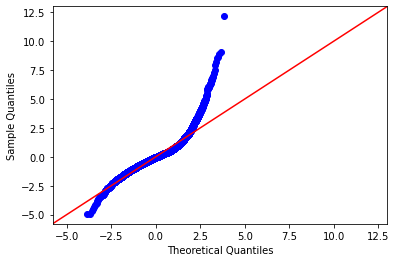

In [70]:
zip_residuals2 = zip_model2.resid
fig = sm.graphics.qqplot(zip_residuals2,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

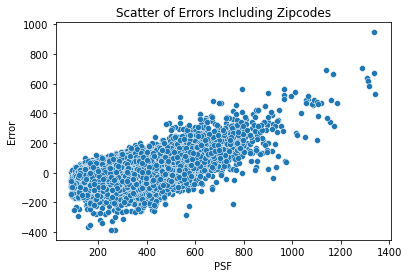

In [71]:
sns.scatterplot(y_train2,zip_residuals2)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('PSF')
plt.ylabel('Error');

## Log Transforming PSF for Zip Codes

In [72]:
zip_df_update2 = zip_df_update

In [73]:
zip_df_update2['psf'] = np.log(zip_df_update['psf'])

In [74]:
x_zip3 = zip_df_update2.drop('psf',axis=1)
y_zip3= zip_df_update2['psf']#.to_numpy().flatten()
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_zip3,y_zip3,test_size=0.2)
zip_model3 = model(x_train3,x_test3,y_train3,y_test3);

Train R2:  0.7643700571039842
Test R2:  0.7614212261533656
Train RMSE:  0.21530119391305436
Test RMSE:  0.21481536385196573


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     820.8
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:42   Log-Likelihood:                 2017.4
No. Observations:               17275   AIC:                            -3897.
Df Residuals:                   17206   BIC:                            -3361.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0397      0.017    295.197      0.000       5.006       5.073
bedrooms        -0.0678      0.002    -32.998      0.000      -0.072      -0.064
floors          -0.1203      0.005    -25.018      0.000      -0.130      -0.111
waterfront       0.6903      0.020     33.822      0.000       0.650       0.730
condition        0.0572      0.003     20.892      0.000       0.052       0.063
grade            0.0381      0.002     20.110      0.000       0.034       0.042
livtolot        -0.1138      0.009    -12.271      0.000      -0.132      -0.096
has_basement     0.2433      0.004     59.573      0.000       0.235       0.251
rec_reno         0.1058      0.011      9.995      0.000       0.085       0.127
zip_98004        1.0875      0.015     74.722      0.000       1.059       1.116
zip_98005        0.6894      0.019     36.401      0.000       0.652       0.727
zip_98006        0.6640      0.012     54.889      0.000       0.640       0.688
zip_98007        0.6488      0.021     30.485      0.000       0.607       0.690
zip_98008        0.6452      0.015     42.494      0.000       0.615       0.675
zip_98010        0.2102      0.024      8.657      0.000       0.163       0.258
zip_98011        0.3943      0.018     21.595      0.000       0.359       0.430
zip_98014        0.2962      0.022     13.583      0.000       0.253       0.339
zip_98019        0.2753      0.018     15.512      0.000       0.241       0.310
zip_98023       -0.0590      0.012     -4.966      0.000      -0.082      -0.036
zip_98024        0.4166      0.027     15.330      0.000       0.363       0.470
zip_98027        0.5005      0.013     39.393      0.000       0.476       0.525
zip_98028        0.3880      0.015     25.565      0.000       0.358       0.418
zip_98029        0.5974      0.014     41.899      0.000       0.569       0.625
zip_98033        0.7669      0.012     61.554      0.000       0.742       0.791
zip_98034        0.5154      0.011     45.666      0.000       0.493       0.538
zip_98038        0.1283      0.011     11.743      0.000       0.107       0.150
zip_98039        1.2458      0.032     38.497      0.000       1.182       1.309
zip_98040        0.8788      0.016     56.487      0.000       0.848       0.909
zip_98045        0.2843      0.017     16.392      0.000       0.250       0.318
zip_98052        0.5975      0.011     53.841      0.000       0.576       0.619
zip_98053        0.5023      0.013     38.077      0.000       0.476       0.528
zip_98055        0.1217      0.015      8.164      0.000       0.092       0.151
zip_98056        0.2799      0.013     22.038      0.000       0.255       0.305
zip_98058        0.1226      0.012      9.889      0.000       0.098       0.147
zip_98059        0.2827      0.012     23.424      0.000       0.259       0.306
zip_9

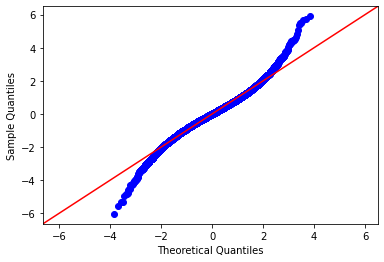

In [75]:
zip_residuals2 = zip_model3.resid
fig = sm.graphics.qqplot(zip_residuals2,dist=stats.norm,line='45',fit=True)

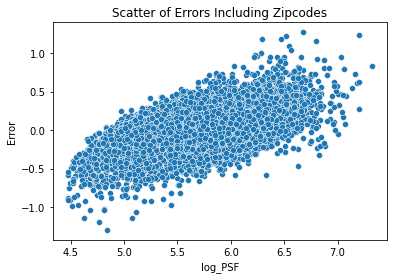

In [76]:
sns.scatterplot(y_train3,zip_residuals2)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* R Squared improved greatly to .76 after adding back zipcodes and log transforming PSF
* Difference in RMSE remains at ~ 1 PSF (.001 log of PSF)
* Residual normality distribution improved, but heavier tails
* Homoscedasticity improved as well, but still does not appear random for larger/smaller PSF

# Iteration 4: Dropping Outliers

* Continuing to improve on the log transformed model with zipcodes

## Modifying Modeling for Outliers

In [77]:
def remove_outliers(df):
    q1 = np.quantile(df,.25)
    q3 = np.quantile(df,.75)
    IQR = q3 - q1
    outliers = df.loc[((q1-1.5*IQR)>df) | (df>(q3+1.5*IQR))].index
    return outliers

In [78]:
def model_outlier(X_train, X_test, y_train, y_test):
    # remove outliers first to avoid data leakage
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
   
    return model

## Model Summary

In [79]:
x_zip4 = zip_df_update2.drop('psf',axis=1)
y_zip4= zip_df_update2['psf']
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_zip4,y_zip4,test_size=0.2)

In [80]:
zip_model4 = model_outlier(x_train4,x_test4,y_train4,y_test4);

Train R2:  0.7640677162795037
Test R2:  0.7555272855745525
Train RMSE:  0.21313106763991582
Test RMSE:  0.2185528672217972


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     818.1
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:43   Log-Likelihood:                 2188.8
No. Observations:               17247   AIC:                            -4240.
Df Residuals:                   17178   BIC:                            -3704.
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.0431      0.017    297.626      0.000       5.010       5.076
bedrooms        -0.0686      0.002    -33.656      0.000      -0.073      -0.065
floors          -0.1233      0.005    -25.851      0.000      -0.133      -0.114
waterfront       0.6757      0.021     32.245      0.000       0.635       0.717
condition        0.0581      0.003     21.478      0.000       0.053       0.063
grade            0.0384      0.002     20.474      0.000       0.035       0.042
livtolot        -0.1089      0.009    -11.889      0.000      -0.127      -0.091
has_basement     0.2390      0.004     58.956      0.000       0.231       0.247
rec_reno         0.0931      0.011      8.741      0.000       0.072       0.114
zip_98004        1.0781      0.015     72.810      0.000       1.049       1.107
zip_98005        0.6925      0.019     35.954      0.000       0.655       0.730
zip_98006        0.6569      0.012     56.205      0.000       0.634       0.680
zip_98007        0.6200      0.022     28.516      0.000       0.577       0.663
zip_98008        0.6278      0.015     41.890      0.000       0.598       0.657
zip_98010        0.1825      0.025      7.369      0.000       0.134       0.231
zip_98011        0.4064      0.018     22.705      0.000       0.371       0.441
zip_98014        0.2878      0.022     12.896      0.000       0.244       0.332
zip_98019        0.2736      0.018     15.201      0.000       0.238       0.309
zip_98023       -0.0671      0.012     -5.755      0.000      -0.090      -0.044
zip_98024        0.4198      0.029     14.384      0.000       0.363       0.477
zip_98027        0.4889      0.013     38.407      0.000       0.464       0.514
zip_98028        0.3888      0.015     26.100      0.000       0.360       0.418
zip_98029        0.5938      0.014     42.353      0.000       0.566       0.621
zip_98033        0.7469      0.013     58.899      0.000       0.722       0.772
zip_98034        0.5208      0.011     46.558      0.000       0.499       0.543
zip_98038        0.1237      0.011     11.393      0.000       0.102       0.145
zip_98039        1.2166      0.035     34.602      0.000       1.148       1.286
zip_98040        0.8533      0.015     56.456      0.000       0.824       0.883
zip_98045        0.2914      0.017     17.309      0.000       0.258       0.324
zip_98052        0.5946      0.011     54.221      0.000       0.573       0.616
zip_98053        0.4922      0.013     38.205      0.000       0.467       0.517
zip_98055        0.1256      0.015      8.281      0.000       0.096       0.155
zip_98056        0.2876      0.012     23.041      0.000       0.263       0.312
zip_98058        0.1196      0.012      9.914      0.000       0.096       0.143
zip_98059        0.2776      0.012     23.198      0.000       0.254       0.301
zip_9

## Assumptions Check

### Normalization

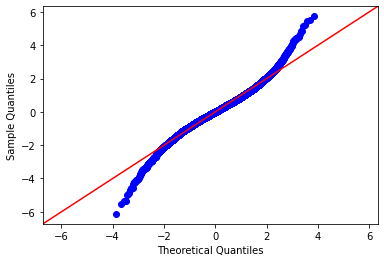

In [81]:
zip_residuals4 = zip_model4.resid
fig = sm.graphics.qqplot(zip_residuals4,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

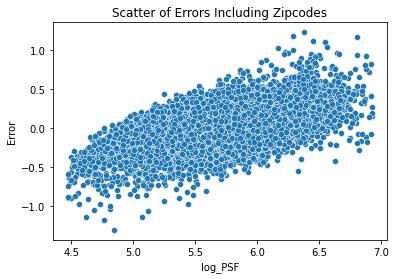

In [82]:
sns.scatterplot(y_train4,zip_residuals4)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* Model removing outliers after log transformation did not improve overall

# Iteration 5: Dropping Outliers before Log Transform

## Updating Model Function

In [83]:
def model_outlier_log(X_train, X_test, y_train, y_test):
    # remove outliers first to avoid data leakage
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers) 
    
    # log transform PSF
    y_train = np.log(y_train)
    y_test = np.log(y_test)
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
   
    return model

In [84]:
zip_out_log = zip_df_update

## Model Summary

In [85]:
x_zol = zip_out_log.drop('psf',axis=1)
y_zol= zip_out_log['psf']
x_train_zol, x_test_zol, y_train_zol, y_test_zol = train_test_split(x_zol,y_zol,test_size=0.2)
zip_model_out_log = model_outlier_log(x_train_zol,x_test_zol,y_train_zol,y_test_zol);

Train R2:  0.7615356100253631
Test R2:  0.7558349567329401
Train RMSE:  0.03795745733174601
Test RMSE:  0.038882618189668906


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     806.6
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:43   Log-Likelihood:                 31944.
No. Observations:               17245   AIC:                        -6.375e+04
Df Residuals:                   17176   BIC:                        -6.321e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6180      0.003    538.881      0.000       1.612       1.624
bedrooms        -0.0122      0.000    -33.491      0.000      -0.013      -0.011
floors          -0.0223      0.001    -26.160      0.000      -0.024      -0.021
waterfront       0.1071      0.004     29.077      0.000       0.100       0.114
condition        0.0102      0.000     21.140      0.000       0.009       0.011
grade            0.0072      0.000     21.532      0.000       0.007       0.008
livtolot        -0.0187      0.002    -11.342      0.000      -0.022      -0.015
has_basement     0.0417      0.001     57.723      0.000       0.040       0.043
rec_reno         0.0152      0.002      8.023      0.000       0.011       0.019
zip_98004        0.1887      0.003     73.488      0.000       0.184       0.194
zip_98005        0.1233      0.003     36.449      0.000       0.117       0.130
zip_98006        0.1178      0.002     55.593      0.000       0.114       0.122
zip_98007        0.1147      0.004     31.109      0.000       0.107       0.122
zip_98008        0.1165      0.003     42.049      0.000       0.111       0.122
zip_98010        0.0424      0.004      9.716      0.000       0.034       0.051
zip_98011        0.0721      0.003     22.810      0.000       0.066       0.078
zip_98014        0.0515      0.004     13.814      0.000       0.044       0.059
zip_98019        0.0467      0.003     14.886      0.000       0.041       0.053
zip_98023       -0.0126      0.002     -6.007      0.000      -0.017      -0.008
zip_98024        0.0741      0.005     15.574      0.000       0.065       0.083
zip_98027        0.0902      0.002     40.113      0.000       0.086       0.095
zip_98028        0.0717      0.003     26.677      0.000       0.066       0.077
zip_98029        0.1089      0.003     43.024      0.000       0.104       0.114
zip_98033        0.1357      0.002     61.937      0.000       0.131       0.140
zip_98034        0.0961      0.002     48.358      0.000       0.092       0.100
zip_98038        0.0204      0.002     10.495      0.000       0.017       0.024
zip_98039        0.2142      0.006     33.273      0.000       0.202       0.227
zip_98040        0.1530      0.003     56.502      0.000       0.148       0.158
zip_98045        0.0549      0.003     18.551      0.000       0.049       0.061
zip_98052        0.1083      0.002     55.070      0.000       0.104       0.112
zip_98053        0.0911      0.002     39.881      0.000       0.087       0.096
zip_98055        0.0206      0.003      7.523      0.000       0.015       0.026
zip_98056        0.0513      0.002     22.880      0.000       0.047       0.056
zip_98058        0.0222      0.002     10.543      0.000       0.018       0.026
zip_98059        0.0527      0.002     24.990      0.000       0.049       0.057
zip_9

## Assumptions Check

### Normality

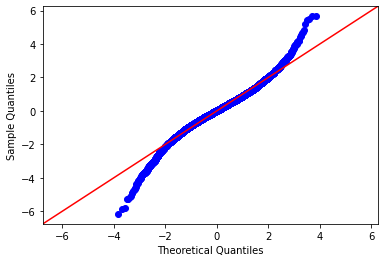

In [86]:
zip_residuals_out_log = zip_model_out_log.resid
fig = sm.graphics.qqplot(zip_residuals_out_log,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

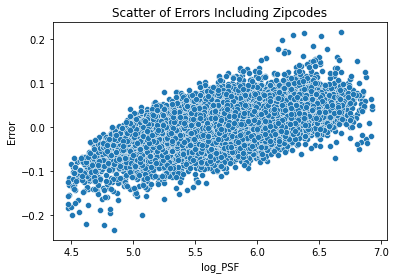

In [87]:
sns.scatterplot(y_train_zol,zip_residuals_out_log)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('log_PSF')
plt.ylabel('Error');

## Findings

* No meaningful improvement over R Squared, RMSE, or Residuals Assumptions

# Iteration 6: Cubed Root Transformation of PSF

## Modifying Model Function

In [88]:
def model_recip(X_train, X_test, y_train, y_test):

    
    # Cubed Root Transform to PSF
    y_train = y_train ** (1/3)
    y_test = y_test ** (1/3)
    
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
   
    return model

## Model Summary

In [89]:
zip_recip = zip_df_update

In [90]:
x_rec = zip_recip.drop('psf',axis=1)
y_rec= zip_recip['psf']
x_train_rec, x_test_rec, y_train_rec, y_test_rec = train_test_split(x_rec,y_rec,test_size=0.2)
zip_model_rec = model_recip(x_train_rec,x_test_rec,y_train_rec,y_test_rec);

Train R2:  0.7610377097680574
Test R2:  0.7707773149900959
Train RMSE:  0.022716896641213385
Test RMSE:  0.022333669104030642


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     805.8
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:44   Log-Likelihood:                 40868.
No. Observations:               17275   AIC:                        -8.160e+04
Df Residuals:                   17206   BIC:                        -8.106e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7153      0.002    953.451      0.000       1.712       1.719
bedrooms        -0.0072      0.000    -32.990      0.000      -0.008      -0.007
floors          -0.0133      0.001    -26.132      0.000      -0.014      -0.012
waterfront       0.0669      0.002     30.775      0.000       0.063       0.071
condition        0.0061      0.000     21.116      0.000       0.006       0.007
grade            0.0041      0.000     20.442      0.000       0.004       0.004
livtolot        -0.0108      0.001    -10.997      0.000      -0.013      -0.009
has_basement     0.0248      0.000     57.487      0.000       0.024       0.026
rec_reno         0.0095      0.001      8.471      0.000       0.007       0.012
zip_98004        0.1142      0.002     74.589      0.000       0.111       0.117
zip_98005        0.0728      0.002     36.298      0.000       0.069       0.077
zip_98006        0.0709      0.001     56.034      0.000       0.068       0.073
zip_98007        0.0682      0.002     30.756      0.000       0.064       0.073
zip_98008        0.0684      0.002     43.311      0.000       0.065       0.071
zip_98010        0.0205      0.003      7.647      0.000       0.015       0.026
zip_98011        0.0434      0.002     23.136      0.000       0.040       0.047
zip_98014        0.0314      0.002     13.451      0.000       0.027       0.036
zip_98019        0.0298      0.002     15.720      0.000       0.026       0.034
zip_98023       -0.0072      0.001     -5.714      0.000      -0.010      -0.005
zip_98024        0.0463      0.003     16.153      0.000       0.041       0.052
zip_98027        0.0538      0.001     39.848      0.000       0.051       0.056
zip_98028        0.0430      0.002     26.829      0.000       0.040       0.046
zip_98029        0.0636      0.002     42.217      0.000       0.061       0.067
zip_98033        0.0805      0.001     61.550      0.000       0.078       0.083
zip_98034        0.0559      0.001     46.874      0.000       0.054       0.058
zip_98038        0.0130      0.001     11.234      0.000       0.011       0.015
zip_98039        0.1285      0.004     34.312      0.000       0.121       0.136
zip_98040        0.0912      0.002     55.966      0.000       0.088       0.094
zip_98045        0.0311      0.002     17.307      0.000       0.028       0.035
zip_98052        0.0643      0.001     55.833      0.000       0.062       0.067
zip_98053        0.0541      0.001     39.792      0.000       0.051       0.057
zip_98055        0.0133      0.002      8.231      0.000       0.010       0.016
zip_98056        0.0303      0.001     22.179      0.000       0.028       0.033
zip_98058        0.0139      0.001     10.797      0.000       0.011       0.016
zip_98059        0.0296      0.001     23.545      0.000       0.027       0.032
zip_9

## Assumptions

### Normalization

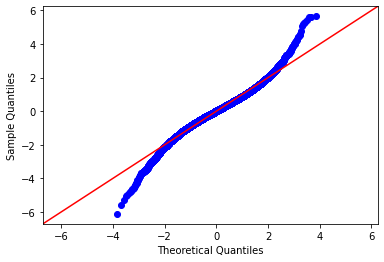

In [91]:
zip_residuals_rec = zip_model_rec.resid
fig = sm.graphics.qqplot(zip_residuals_rec,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

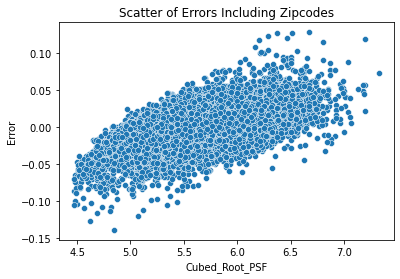

In [92]:
sns.scatterplot(y_train_rec,zip_residuals_rec)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('Cubed_Root_PSF')
plt.ylabel('Error');

## Findings

* No improvement overall in correcting the assumptions nor statistical values
* Log transform is a stronger transformation, expected weaker results from the cubed root

# Conclusion

## Model Summary of Log Transformed PSF including Zipcodes

* Best performing model from the iterations performed above

In [93]:
zip_df_update2 = zip_df_update
# Log Transform First
zip_df_update2['psf'] = np.log(zip_df_update['psf'])

In [94]:
x_zip3 = zip_df_update2.drop('psf',axis=1)
y_zip3= zip_df_update2[['psf']].to_numpy().flatten()
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_zip3,y_zip3,test_size=0.2)
zip_model3 = model(x_train2,x_test2,y_train2,y_test2);

Train R2:  0.7617206126201899
Test R2:  0.7633558405619651
Train RMSE:  0.03829725932064806
Test RMSE:  0.03806240074357365


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     808.9
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:40:44   Log-Likelihood:                 31845.
No. Observations:               17275   AIC:                        -6.355e+04
Df Residuals:                   17206   BIC:                        -6.302e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6166      0.003    533.847      0.000       1.611       1.623
bedrooms        -0.0125      0.000    -34.214      0.000      -0.013      -0.012
floors          -0.0220      0.001    -25.702      0.000      -0.024      -0.020
waterfront       0.1119      0.004     31.852      0.000       0.105       0.119
condition        0.0105      0.000     21.554      0.000       0.010       0.011
grade            0.0072      0.000     21.604      0.000       0.007       0.008
livtolot        -0.0192      0.002    -11.657      0.000      -0.022      -0.016
has_basement     0.0421      0.001     58.077      0.000       0.041       0.044
rec_reno         0.0178      0.002      9.415      0.000       0.014       0.022
zip_98004        0.1896      0.003     74.992      0.000       0.185       0.195
zip_98005        0.1238      0.003     35.382      0.000       0.117       0.131
zip_98006        0.1196      0.002     55.511      0.000       0.115       0.124
zip_98007        0.1166      0.004     31.732      0.000       0.109       0.124
zip_98008        0.1149      0.003     42.552      0.000       0.110       0.120
zip_98010        0.0362      0.004      8.081      0.000       0.027       0.045
zip_98011        0.0742      0.003     23.679      0.000       0.068       0.080
zip_98014        0.0573      0.004     14.552      0.000       0.050       0.065
zip_98019        0.0495      0.003     15.215      0.000       0.043       0.056
zip_98023       -0.0112      0.002     -5.318      0.000      -0.015      -0.007
zip_98024        0.0780      0.005     16.126      0.000       0.068       0.087
zip_98027        0.0905      0.002     38.935      0.000       0.086       0.095
zip_98028        0.0717      0.003     26.815      0.000       0.066       0.077
zip_98029        0.1087      0.003     42.400      0.000       0.104       0.114
zip_98033        0.1364      0.002     61.184      0.000       0.132       0.141
zip_98034        0.0959      0.002     47.453      0.000       0.092       0.100
zip_98038        0.0211      0.002     10.769      0.000       0.017       0.025
zip_98039        0.2146      0.006     33.976      0.000       0.202       0.227
zip_98040        0.1550      0.003     56.316      0.000       0.150       0.160
zip_98045        0.0575      0.003     19.233      0.000       0.052       0.063
zip_98052        0.1093      0.002     55.795      0.000       0.105       0.113
zip_98053        0.0924      0.002     39.841      0.000       0.088       0.097
zip_98055        0.0214      0.003      7.750      0.000       0.016       0.027
zip_98056        0.0549      0.002     23.901      0.000       0.050       0.059
zip_98058        0.0233      0.002     10.700      0.000       0.019       0.028
zip_98059        0.0526      0.002     24.437      0.000       0.048       0.057
zip_9

### Normalization

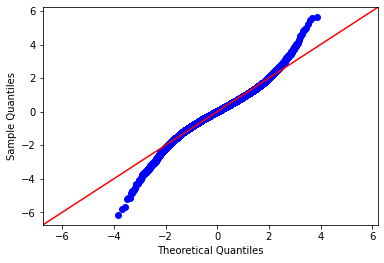

In [95]:
zip_residuals3 = zip_model3.resid
fig = sm.graphics.qqplot(zip_residuals3,dist=stats.norm,line='45',fit=True)

### Homoscedasticity

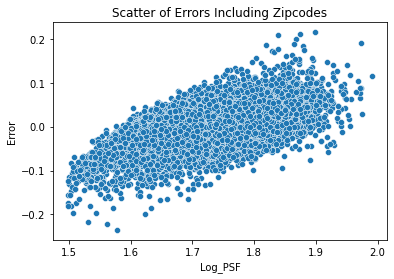

In [96]:
sns.scatterplot(y_train2,zip_residuals3)
plt.title('Scatter of Errors Including Zipcodes')
plt.xlabel('Log_PSF')
plt.ylabel('Error');

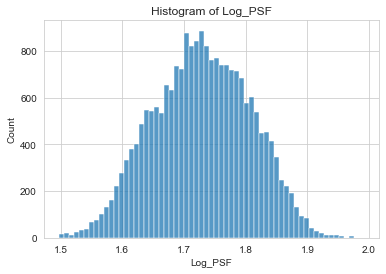

In [131]:
sns.histplot(y_zip3);
plt.title("Histogram of Log_PSF")
plt.xlabel("Log_PSF");

In [97]:
print("Train RMSE Exp:",np.e**0.038022)
print("Test RMSE Exp:",np.e**0.039147)


Train RMSE Exp: 1.0387540852169959
Test RMSE Exp: 1.0399233411460052


### High Effects on log PSF

In [123]:
((np.e**(zip_model3.params.sort_values(ascending=False))-1)*100).head(10)

Intercept    403.595257
zip_98039     23.936597
zip_98004     20.882574
zip_98119     20.691204
zip_98112     20.334079
zip_98109     20.332821
zip_98102     20.224774
zip_98105     18.854082
zip_98107     18.625571
zip_98103     17.407096
dtype: float64

### Lowest and Negative Effects on log PSF

In [124]:
((np.e**(zip_model3.params.sort_values(ascending=False))-1)*100).tail(10)

zip_98148    2.064174
zip_98188    2.056964
rec_reno     1.797206
zip_98168    1.719765
condition    1.051671
grade        0.727114
zip_98023   -1.112282
bedrooms    -1.244346
livtolot    -1.898404
floors      -2.172668
dtype: float64

In [122]:
# Waterfront Coefficient
(np.e**.1119-1)*100

11.840101495135858

In [125]:
# Basement COefficient
(np.e**.0421-1)*100

4.299877341328462

## Visualizing Zipcode Locations

In [109]:
def high_test(zipcode):
    high_zips = [98039,98004,98109,98119,98112,98102,98105]
    low_zips = [98148,98188,98168,98023]
    if zipcode in high_zips:
        return 2
    if zipcode in low_zips:
        return 0
    else:
        return 1

In [110]:
geo_zips = df

In [111]:
geo_zips['high_zip'] = geo_zips['zipcode'].apply(high_test)

In [112]:
geo_zips.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,high_zip,psf
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1,188.050847
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,247.926267
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1,233.766234
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,575.238095
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1,303.571429


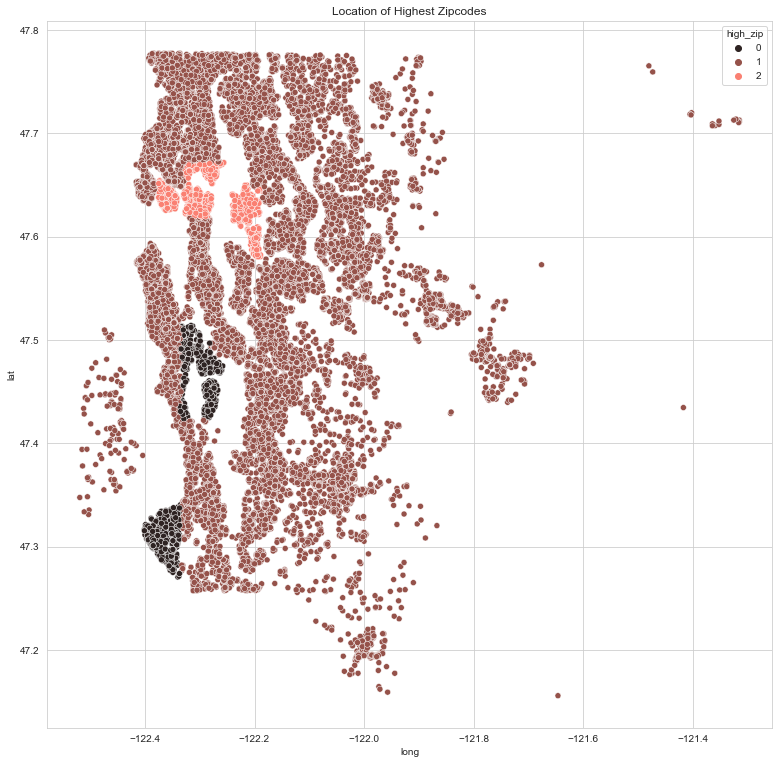

In [121]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(13,13))

sns.scatterplot(y = geo_zips.lat, x = geo_zips.long, hue=geo_zips['high_zip'], ax=ax, palette ='dark:salmon')
ax.set_title('Location of Highest Zipcodes');


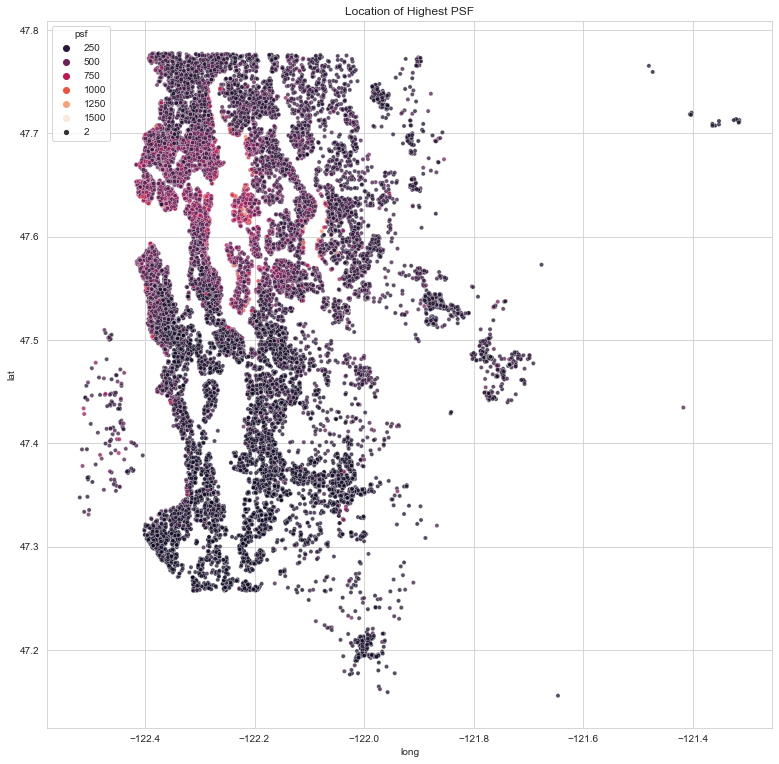

In [107]:
geo_zips['psf'] = geo_zips['price'] / geo_zips['sqft_above']

fig, ax = plt.subplots(figsize=(13,13))
sns.scatterplot(x=geo_zips.long,y=geo_zips.lat, hue=geo_zips.psf, palette='rocket', alpha=.75, size =2)
ax.set_title('Location of Highest PSF');

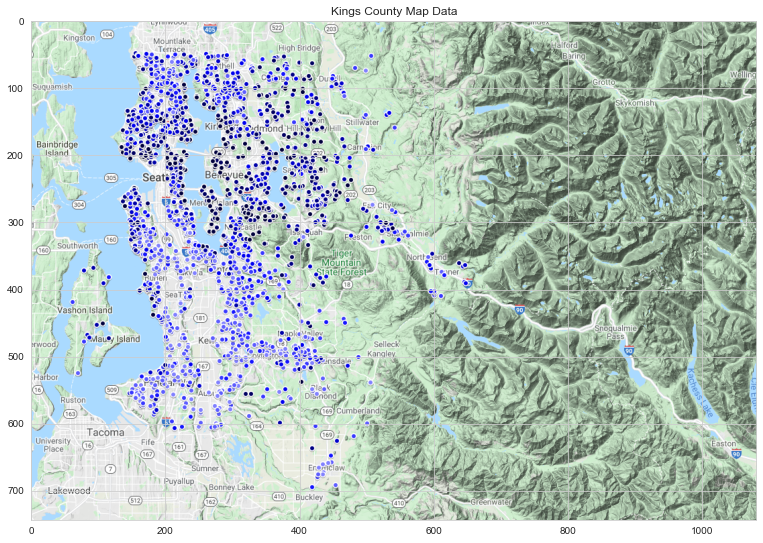

In [108]:
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(13,13))
img = mpimg.imread('data/zoomed_map.png')
imgplot = plt.imshow(img)
plt.title('Kings County Map Data');

## Final Results and Findings:


*  R Squared: 0.76, Features explain 76% of the variation in the log of PSF
*  Difference between Train and Test Log RSME: ~.001
*  Residuals are almost normally distributed, but they have heavy tails indicating that large errors are more likely for extreme values
*  Model is heteroscedastic, smaller PSF are overpredicted while larger PSF are underpredicted.  Likely due to the inclusion of luxury homes in the data<br>

___
*  Highest effect on PSF is location:
    1.  PSF for similar homes are 20% higher in areas closer to the mid-northern area of the city compared to our base line zipcode 98001 located in the southern area
    2.  PSF for similar homes are 1-2% higher in areas near our base line zipcode of 98001 and around the airports
        a. Likely due to the effects of noise, or traffic
    3.  PSF for similar homes with a waterfront are 12% higher than homes without a waterfront 
___
*  Home features do not have as high impact on PSF
    1.  PSF for homes with basements are 4.3% higher than homes without
    2.  Homes with renovations within the last 27 years have 1.8% higher PSF than homes without
    3.  A 1 unit increase in the condition or grade of the home leads to ~ 1% increase in PSF
    4.  A 1 bedroom increase in similar homes leads to a 1.2% decrease in PSF
        a. Likely due to a preference for open concepts or larger bedrooms
    5.  A 1 unit increase to the ratio of living square feet to lot size square feet leads to a 1.9% decrease in PSF
        a. A larger lot for similar sized homes is preferable
    6.  The existence of 1 additional floor leads to a 2.2% decrease in PSF
        a. Climbing more stairs around your home is less desirable